# Chapter 24 How to Develop CNNs for Human Activity Recognition

In this tutorial, you will discover how to develop one-dimensional convolutional neural networks for time series classification on the problem of human activity recognition. After completing this tutorial, you will know:

- How to load and prepare the data for a standard human activity recognition dataset and develop a single 1D CNN model that achieves excellent performance on the raw data.
- How to further tune the performance of the model, including data transformation, filter maps, and kernel sizes.
- How to develop a sophisticated multi-headed one-dimensional convolutional neural network model that provides an ensemble-like result.

## 24.1 Tutorial Overview
This tutorial is divided into four parts; they are:
1. Activity Recognition Using Smartphones Dataset 
2. CNN for Activity Recognition
3. Tuned CNN Model
4. Multi-headed CNN Model

## 24.2 Activity Recognition Using Smartphones Dataset

see Chapter 22.

## 24.3 CNN for Activity Recognition

This section is divided into 4 parts; they are:
1. Load Data
2. Fit and Evaluate Model 
3. Summarize Results
4. Complete Example

### 24.3.1 Load Data

In [1]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [3]:
# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded

In [4]:
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/' # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
      # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
      # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
      # load input data
    X = load_group(filenames, filepath)
      # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

In [5]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/') 
    print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

### 24.3.2 Fit and Evaluate Model

The model requires a three-dimensional input with **[samples, timesteps, features]**.

There is nothing special about the network structure or chosen hyperparameters; they are just a starting point for this problem.

In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    # define the CNN model
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps,n_features))) 
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

### 24.3.3 Summarize Results

In [7]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores) 
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [8]:
# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy) 
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score)) 
        scores.append(score)
    # summarize results
    summarize_results(scores)

### 24.3.4 Complete Example

In [11]:
# cnn model for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded
    
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/' # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
      # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
      # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
      # load input data
    X = load_group(filenames, filepath)
      # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    # print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/') 
    # print(testX.shape, testy.shape)
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    # print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    # define the CNN model
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps,n_features))) 
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores) 
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
    
# run an experiment
def run_experiment(repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy) 
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score)) 
        scores.append(score)
    # summarize results
    summarize_results(scores)
    
if __name__ == '__main__':
    run_experiment()

(7352, 128, 1) (7352, 1)
(2947, 128, 1) (2947, 1)
(7352, 128, 1) (7352, 6) (2947, 128, 1) (2947, 6)
>#1: 76.926
>#2: 80.217
>#3: 77.265
>#4: 78.928
>#5: 76.722
>#6: 75.534
>#7: 74.686
>#8: 74.856
>#9: 80.285
>#10: 73.668
[76.92568898200989, 80.21717071533203, 77.26501822471619, 78.92772555351257, 76.72209143638611, 75.53443908691406, 74.6861219406128, 74.85578656196594, 80.28503656387329, 73.6681342124939]
Accuracy: 76.909% (+/-2.194)


## 24.4 Tuned CNN Model

In this section, we will tune the model in an effort to further improve performance on the problem. We will look at three main areas:
1. Data Preparation 
2. Number of Filters 
3. Size of Kernel

### 24.4.1 Data Preparation

the data has been split into windows of 128 time steps, with a 50% overlap.

Therefore, in order to get a fair idea of the data distribution, we must first remove the duplicated observations (the overlap), then remove the windowing of the data.

In [ ]:
# remove overlap
cut = int(trainX.shape[1] / 2)
longX = trainX[:, -cut:, :]
# flatten windows
longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))

**Distribution**

load: (7352, 128, 1) (7352, 6) (2947, 128, 1) (2947, 6)


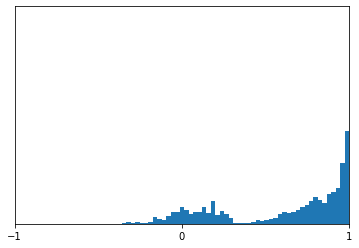

In [20]:
# plot distributions for the har dataset
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded
    
# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
    'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
    'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
    'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    return trainX, trainy, testX, testy

# plot a histogram of each variable in the dataset
def plot_variable_distributions(trainX):
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    pyplot.figure()
    for i in range(longX.shape[1]):
        # create figure
        ax = pyplot.subplot(longX.shape[1], 1, i+1)
        ax.set_xlim(-1, 1)
        # create histogram
        pyplot.hist(longX[:, i], bins=100)
        # simplify axis remove clutter
        pyplot.yticks([])
        pyplot.xticks([-1,0,1])
    pyplot.show()
    
if __name__ == '__main__':
    # load data
    trainX, trainy, testX, testy = load_dataset()
    print('load:',trainX.shape,trainy.shape,testX.shape,testy.shape)
    # plot histograms
    plot_variable_distributions(trainX)

**standardization transform**

The complete code listing is provided below.

>p=False #1: 78.622
>p=False #2: 78.113
>p=False #3: 78.351
>p=False #4: 77.197
>p=False #5: 75.365
>p=False #6: 74.856
>p=False #7: 77.706
>p=False #8: 74.041
>p=False #9: 78.079
>p=False #10: 78.351
>p=True #1: 78.894
>p=True #2: 75.467
>p=True #3: 79.912
>p=True #4: 79.267
>p=True #5: 79.335
>p=True #6: 79.844
>p=True #7: 76.315
>p=True #8: 81.065
>p=True #9: 79.539
>p=True #10: 77.808
[[78.6223292350769, 78.11333537101746, 78.35086584091187, 77.19715237617493, 75.36478042602539, 74.85578656196594, 77.7061402797699, 74.04139637947083, 78.07940244674683, 78.35086584091187], [78.89379262924194, 75.4665732383728, 79.91177439689636, 79.2670488357544, 79.33491468429565, 79.8439085483551, 76.31489634513855, 81.0654878616333, 79.53851222991943, 77.80793905258179]] [False, True]
Param=False: 77.068% (+/-1.588)
Param=True: 78.744% (+/-1.636)


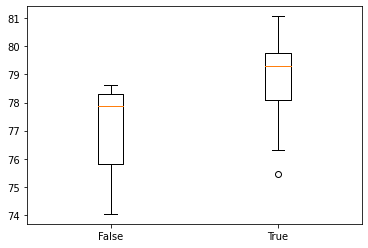

In [22]:
# cnn model with standardization for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
    'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
    'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
    'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    return trainX, trainy, testX, testy

# standardize data
def scale_data(trainX, testX, standardize):
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    # flatten train and test
    flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
    flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
    # standardize
    if standardize:
        s = StandardScaler()
        # fit on training data
        s.fit(longX)
        # apply to training and test data
        longX = s.transform(longX)
        flatTrainX = s.transform(flatTrainX)
        flatTestX = s.transform(flatTestX)
    # reshape
    flatTrainX = flatTrainX.reshape((trainX.shape))
    flatTestX = flatTestX.reshape((testX.shape))
    return flatTrainX, flatTestX

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, param):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1] 
    # scale data
    trainX, testX = scale_data(trainX, testX, param)
    model = Sequential()
    model.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps,n_features))) 
    model.add(Conv1D(64, 3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

# summarize scores
def summarize_results(scores, params):
    print(scores, params)
    # summarize mean and standard deviation
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%s: %.3f%% (+/-%.3f)' % (params[i], m, s)) 
    # boxplot of scores
    pyplot.boxplot(scores, labels=params) 
    pyplot.savefig('exp_cnn_standardize.png')

# run an experiment
def run_experiment(params, repeats=10):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # test each parameter
    all_scores = list()
    for p in params:
        # repeat experiment
        scores = list()
        for r in range(repeats):
            score = evaluate_model(trainX, trainy, testX, testy, p) 
            score = score * 100.0
            print('>p=%s #%d: %.3f' % (p, r+1, score)) 
            scores.append(score)
        all_scores.append(scores)
    # summarize results
    summarize_results(all_scores, params)
    
if __name__ == '__main__':
    # run the experiment
    n_params = [False, True]
    run_experiment(n_params)

### 24.4.2 Number of Filters

>p=8 #1: 79.063
>p=8 #2: 78.012
>p=8 #3: 76.043
>p=16 #1: 79.369
>p=16 #2: 76.620
>p=16 #3: 78.826
>p=32 #1: 77.808
>p=32 #2: 77.570
>p=32 #3: 77.197
>p=64 #1: 79.335
>p=64 #2: 79.674
>p=64 #3: 77.944
>p=128 #1: 76.926
>p=128 #2: 77.978
>p=128 #3: 78.283
>p=256 #1: 79.539
>p=256 #2: 80.489
>p=256 #3: 74.992
[[79.06345725059509, 78.01153659820557, 76.04343295097351], [79.36884760856628, 76.62029266357422, 78.82592678070068], [77.80793905258179, 77.57040858268738, 77.19715237617493], [79.33491468429565, 79.67424392700195, 77.9436707496643], [76.92568898200989, 77.97760367393494, 78.2829999923706], [79.53851222991943, 80.48863410949707, 74.99151825904846]] [8, 16, 32, 64, 128, 256]
Param=8: 77.706% (+/-1.252)
Param=16: 78.272% (+/-1.189)
Param=32: 77.525% (+/-0.251)
Param=64: 78.984% (+/-0.749)
Param=128: 77.729% (+/-0.581)
Param=256: 78.340% (+/-2.399)


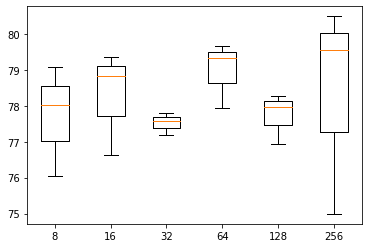

In [23]:
# cnn model with filters for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
    'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
    'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
    'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    return trainX, trainy, testX, testy

# standardize data
def scale_data(trainX, testX, standardize):
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    # flatten train and test
    flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
    flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
    # standardize
    if standardize:
        s = StandardScaler()
        # fit on training data
        s.fit(longX)
        # apply to training and test data
        longX = s.transform(longX)
        flatTrainX = s.transform(flatTrainX)
        flatTestX = s.transform(flatTestX)
    # reshape
    flatTrainX = flatTrainX.reshape((trainX.shape))
    flatTestX = flatTestX.reshape((testX.shape))
    return flatTrainX, flatTestX

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1] 
    model = Sequential()
    model.add(Conv1D(n_filters, 3, activation='relu', input_shape=(n_timesteps,n_features))) 
    model.add(Conv1D(n_filters, 3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

# summarize scores
def summarize_results(scores, params):
    print(scores, params)
    # summarize mean and standard deviation
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%s: %.3f%% (+/-%.3f)' % (params[i], m, s)) 
    # boxplot of scores
    pyplot.boxplot(scores, labels=params) 
    pyplot.savefig('exp_cnn_standardize.png')

# run an experiment
def run_experiment(params, repeats=3):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # test each parameter
    all_scores = list()
    for p in params:
        # repeat experiment
        scores = list()
        for r in range(repeats):
            score = evaluate_model(trainX, trainy, testX, testy, p) 
            score = score * 100.0
            print('>p=%s #%d: %.3f' % (p, r+1, score)) 
            scores.append(score)
        all_scores.append(scores)
    # summarize results
    summarize_results(all_scores, params)
    
if __name__ == '__main__':
    # run the experiment
    n_params = [8, 16, 32, 64, 128, 256]
    run_experiment(n_params)

### 24.4.3 Size of Kernel

>p=2 #1: 76.281
>p=2 #2: 79.606
>p=2 #3: 75.467
>p=3 #1: 78.622
>p=3 #2: 79.810
>p=3 #3: 79.233
>p=5 #1: 80.896
>p=5 #2: 78.724
>p=5 #3: 81.473
>p=7 #1: 80.048
>p=7 #2: 81.405
>p=7 #3: 77.333
>p=11 #1: 79.776
>p=11 #2: 79.301
>p=11 #3: 81.744
[[76.28096342086792, 79.6063780784607, 75.4665732383728], [78.6223292350769, 79.80997562408447, 79.23311591148376], [80.89582920074463, 78.7241280078888, 81.47268295288086], [80.04750609397888, 81.4048171043396, 77.33287811279297], [79.77604269981384, 79.30098176002502, 81.7441463470459]] [2, 3, 5, 7, 11]
Param=2: 77.118% (+/-1.791)
Param=3: 79.222% (+/-0.485)
Param=5: 80.364% (+/-1.183)
Param=7: 79.595% (+/-1.693)
Param=11: 80.274% (+/-1.058)


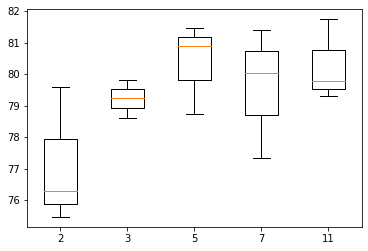

In [24]:
# cnn model vary kernel size for the har dataset
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
    'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
    'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
    'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    return trainX, trainy, testX, testy

# standardize data
def scale_data(trainX, testX, standardize):
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    # flatten train and test
    flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
    flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
    # standardize
    if standardize:
        s = StandardScaler()
        # fit on training data
        s.fit(longX)
        # apply to training and test data
        longX = s.transform(longX)
        flatTrainX = s.transform(flatTrainX)
        flatTestX = s.transform(flatTestX)
    # reshape
    flatTrainX = flatTrainX.reshape((trainX.shape))
    flatTestX = flatTestX.reshape((testX.shape))
    return flatTrainX, flatTestX

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_kernel):
    verbose, epochs, batch_size = 0, 15, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1] 
    model = Sequential()
    model.add(Conv1D(64, n_kernel, activation='relu', input_shape=(n_timesteps,n_features))) 
    model.add(Conv1D(64, n_kernel, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    return accuracy

# summarize scores
def summarize_results(scores, params):
    print(scores, params)
    # summarize mean and standard deviation
    for i in range(len(scores)):
        m, s = mean(scores[i]), std(scores[i])
        print('Param=%s: %.3f%% (+/-%.3f)' % (params[i], m, s)) 
    # boxplot of scores
    pyplot.boxplot(scores, labels=params) 
    pyplot.savefig('exp_cnn_standardize.png')

# run an experiment
def run_experiment(params, repeats=3):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # test each parameter
    all_scores = list()
    for p in params:
        # repeat experiment
        scores = list()
        for r in range(repeats):
            score = evaluate_model(trainX, trainy, testX, testy, p) 
            score = score * 100.0
            print('>p=%s #%d: %.3f' % (p, r+1, score)) 
            scores.append(score)
        all_scores.append(scores)
    # summarize results
    summarize_results(all_scores, params)
    
if __name__ == '__main__':
    # run the experiment
    n_params = [2, 3, 5, 7, 11]
    run_experiment(n_params)

## 24.5 Multi-headed CNN Model

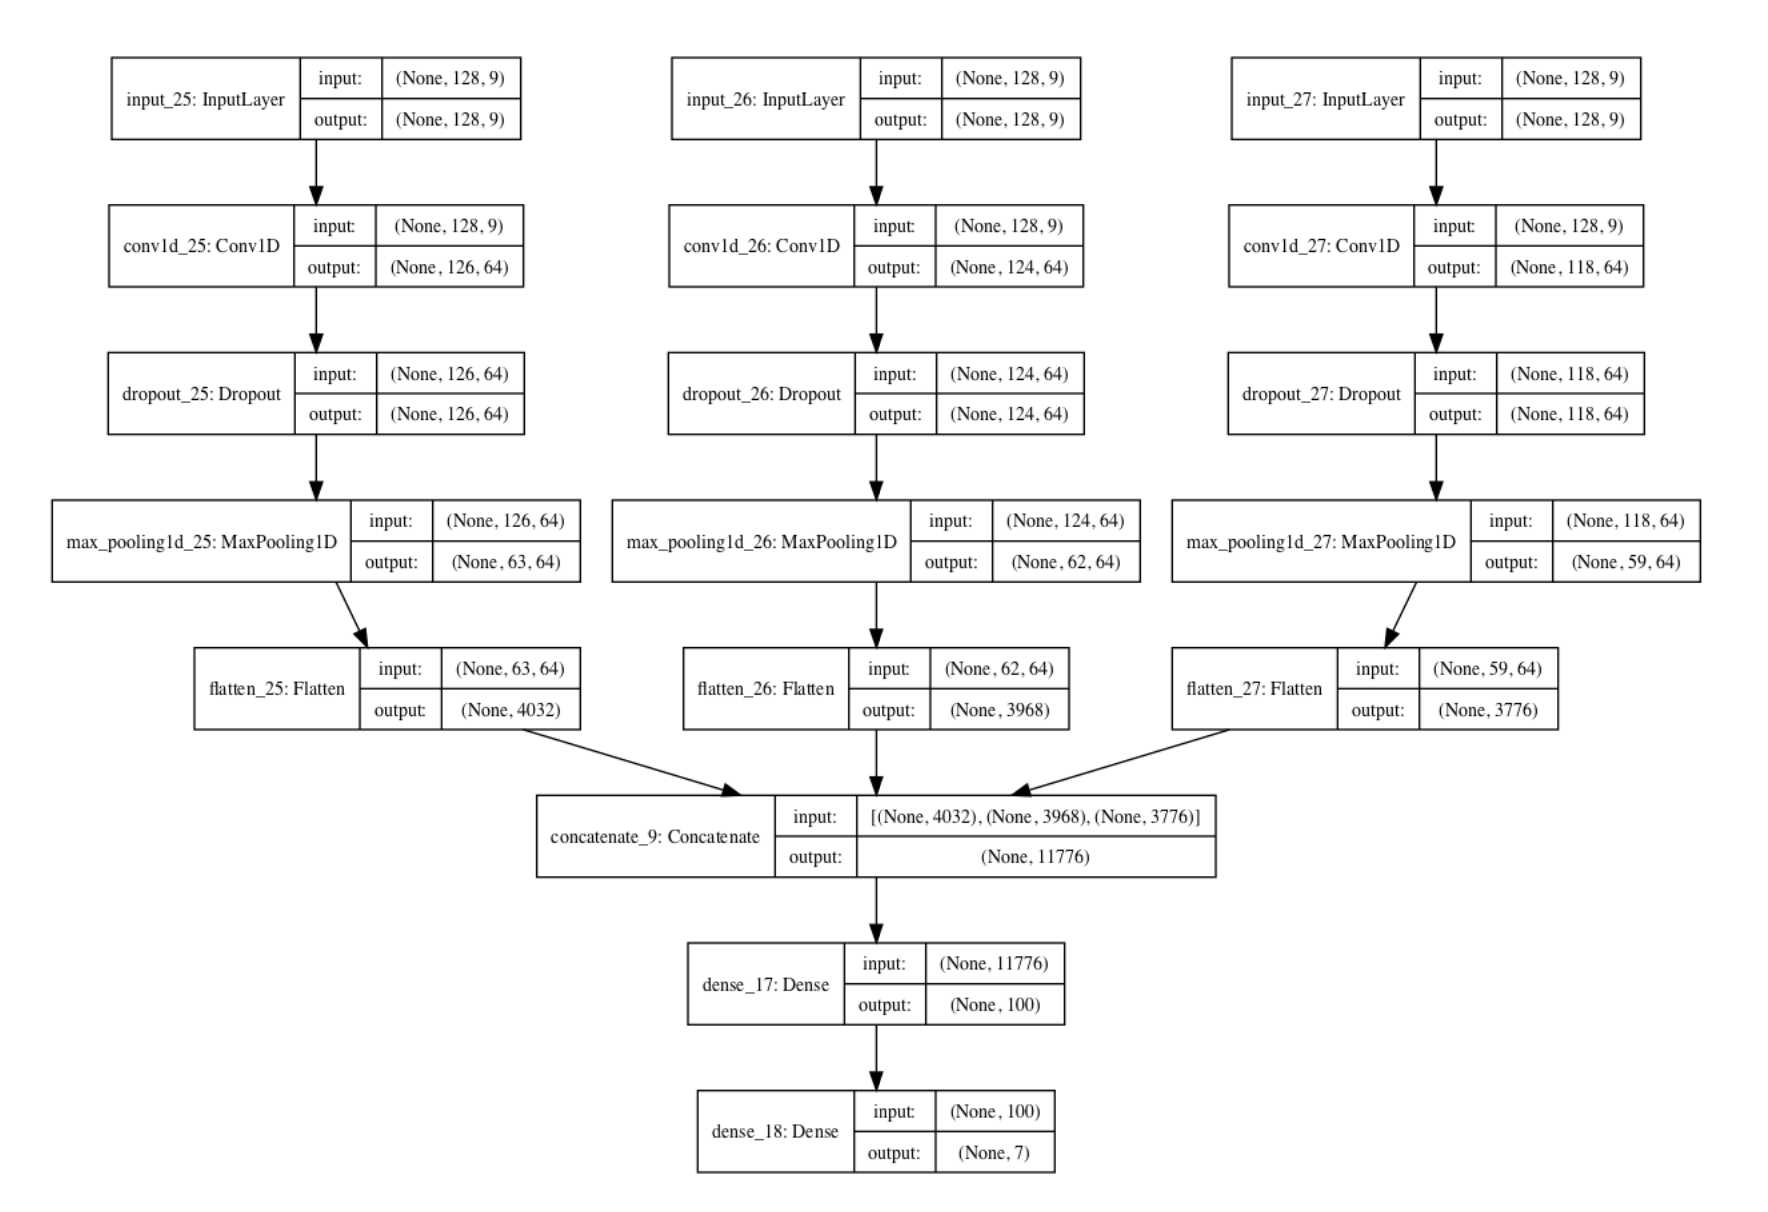

In [28]:
# multi-headed cnn model for the har dataset
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten

from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate


# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''): 
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
        # stack group so that features are the 3rd dimension
        loaded = dstack(loaded)
        return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    # load all 9 files as a single array
    filenames = list()
    # total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt',
    'total_acc_z_'+group+'.txt']
    # body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt',
    'body_acc_z_'+group+'.txt']
    # body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt',
    'body_gyro_z_'+group+'.txt']
    # load input data
    X = load_group(filenames, filepath)
    # load class output
    y = load_file(prefix + group + '/y_'+group+'.txt') 
    return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/') 
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
    # zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # one hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    return trainX, trainy, testX, testy

# standardize data
def scale_data(trainX, testX, standardize):
    # remove overlap
    cut = int(trainX.shape[1] / 2)
    longX = trainX[:, -cut:, :]
    # flatten windows
    longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
    # flatten train and test
    flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
    flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
    # standardize
    if standardize:
        s = StandardScaler()
        # fit on training data
        s.fit(longX)
        # apply to training and test data
        longX = s.transform(longX)
        flatTrainX = s.transform(flatTrainX)
        flatTestX = s.transform(flatTestX)
    # reshape
    flatTrainX = flatTrainX.reshape((trainX.shape))
    flatTestX = flatTestX.reshape((testX.shape))
    return flatTrainX, flatTestX

# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1] 
    # head 1
    inputs1 = Input(shape=(n_timesteps,n_features))
    conv1 = Conv1D(64, 3, activation='relu')(inputs1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D()(drop1)
    flat1 = Flatten()(pool1)
    # head 2
    inputs2 = Input(shape=(n_timesteps,n_features))
    conv2 = Conv1D(64, 5, activation='relu')(inputs2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D()(drop2)
    flat2 = Flatten()(pool2)
    # head 3
    inputs3 = Input(shape=(n_timesteps,n_features))
    conv3 = Conv1D(64, 11, activation='relu')(inputs3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D()(drop3)
    flat3 = Flatten()(pool3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(100, activation='relu')(merged)
    outputs = Dense(n_outputs, activation='softmax')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    
    # save a plot of the model
    #plot_model(model, show_shapes=True, to_file='multiheaded.png') 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # fit network
    model.fit([trainX,trainX,trainX], trainy, epochs=epochs, batch_size=batch_size,
      verbose=verbose)
    # evaluate model
    _, accuracy = model.evaluate([testX,testX,testX], testy, batch_size=batch_size, verbose=0)
    return accuracy

# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores) 
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s)) 
    
# run an experiment
def run_experiment(repeats=3):
    # load data
    trainX, trainy, testX, testy = load_dataset()
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(trainX, trainy, testX, testy) 
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score)) 
        scores.append(score)
    # summarize results
    summarize_results(scores)

    
if __name__ == '__main__':
    # run the experiment
    run_experiment()

>#1: 79.912
>#2: 79.912
>#3: 81.880
[79.91177439689636, 79.91177439689636, 81.87987804412842]
Accuracy: 80.568% (+/-0.928)


## 24.6 Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.
- Number of Variables. Run experiments to see if all nine variables are required in the CNN or if it can do as well or better with a subset, such as just total acceleration.
- Date Preparation. Explore other data preparation schemes such as data normalization and perhaps normalization after standardization.
- Network Architecture. Explore other network architectures, such as deeper CNN architectures and deeper fully-connected layers for interpreting the CNN input features.
- Diagnostics. Use simple learning curve diagnostics to interpret how the model is learning over the epochs and whether more regularization, different learning rates, or different batch sizes or numbers of epochs may result in a better performing or more stable model.


## 24.8 Summary

In this tutorial, you discovered how to develop one-dimensional convolutional neural networks for time series classification on the problem of human activity recognition. Specifically, you learned:
- How to load and prepare the data for a standard human activity recognition dataset and develop a single 1D CNN model that achieves excellent performance on the raw data.
- How to further tune the performance of the model, including data transformation, filter maps, and kernel sizes.
- How to develop a sophisticated multi-headed one-dimensional convolutional neural network model that provides an ensemble-like result.